<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# **Hands-on practice lab: Model Development**

Estimated time needed: **45** minutes

In this lab, you will use the skills acquired in throughout the module, and use linear regression principles to create a model that predicts the Price of the laptop, based on one or more attributes of the dataset.


# Objectives

After completing this lab you will be able to:

 - Use Linear Regression in one variable to fit the parameters to a model
 - Use Linear Regression in multiple variables to fit the parameters to a model
 - Use Polynomial Regression in single variable tofit the parameters to a model
 - Create a pipeline for performing linear regression using multiple features in polynomial scaling
 - Evaluate the performance of different forms of regression on basis of MSE and R^2 parameters


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [1]:
import piplite

import skillsnetwork

ModuleNotFoundError: No module named 'piplite'

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

### Importing the dataset
Run the cell below to download the dataset into this environment.


Load the dataset into a pandas dataframe


In [3]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'
df = pd.read_csv(filepath, header=0)

# Task 1 : Single Linear Regression

You have learnt that "CPU_frequency" is the parameter with the lowest p-value among the different features of the dataset. Create a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.


In [4]:
# Write your code below and press Shift+Enter to execute 
lm = LinearRegression()
X = df[['CPU_frequency']]
Y = df['Price']

lm.fit(X,Y)

YHat = lm.predict(X)

Generate the Distribution plot for the predicted values and that of the actual values. How well did the model perform?


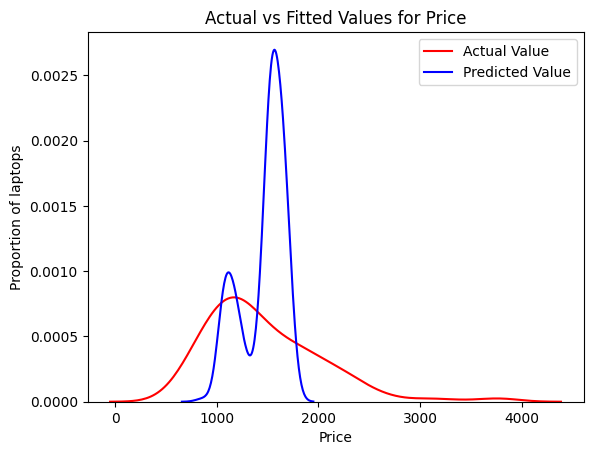

In [6]:
# Write your code below and press Shift+Enter to execute 
ax1 = sns.distplot(df['Price'], hist=False, color='r', label='Actual Value')

sns.distplot(YHat, hist=False, color="b", label="Fitted Values", ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

Evaluate the Mean Squared Error and R^2 score values for the model. 


In [8]:
# Write your code below and press Shift+Enter to execute 
mse_slr = mean_squared_error(df['Price'], YHat)
mse_slr

284583.4405868629

In [10]:
r2_score_slr = lm.score(X, Y)
r2_score_slr

0.1344436321024326

# Task 2 - Multiple Linear Regression
The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression system. 


In [14]:
# Write your code below and press Shift+Enter to execute 
lm1 = LinearRegression()
Z = df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
lm1.fit(Z, Y)
Y_hat = lm1.predict(Z)

Plot the Distribution graph of the predicted values as well as the Actual values


Text(0, 0.5, 'Proportion of Laptops')

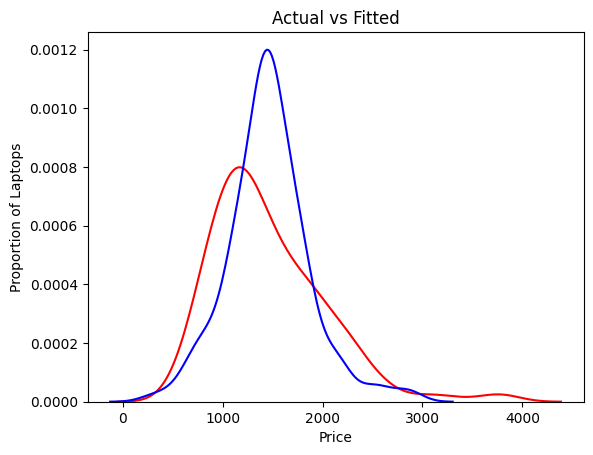

In [16]:
# Write your code below and press Shift+Enter to execute
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values", ax=ax1)

plt.title("Actual vs Fitted")
plt.xlabel('Price')
plt.ylabel('Proportion of Laptops')

Find the R^2 score and the MSE value for this fit. Is this better or worst than the performance of Single Linear Regression?


In [20]:
# Write your code below and press Shift+Enter to execute
mse_mlr = mean_squared_error(df['Price'], Y_hat)
r2_score_mlr = lm.score(X, Y)

In [21]:
print("MSE: ", mse_mlr)
print("R Score:", r2_score_mlr)

MSE:  161680.57263893107
R Score: 0.1344436321024326


# Task 3 - Polynomial Regression
Use the variable "CPU_frequency" to create Polynomial features. Try this for 3 different values of polynomial degrees. Remember that polynomial fits are done using `numpy.polyfit`. 


In [29]:
#  Write your code below and press Shift+Enter to execute

f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)

Plot the regression output against the actual data points to note how the data fits in each case. To plot the polynomial response over the actual data points, you have the function shown below.


In [30]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

Call this function for the 3 models created and get the required graphs.


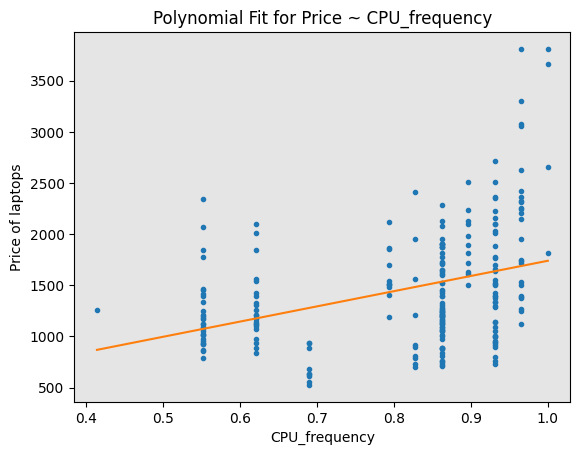

In [31]:
#  Write your code below and press Shift+Enter to execute
# Call for function of degree 1
PlotPolly(p1, X, Y, 'CPU_frequency')

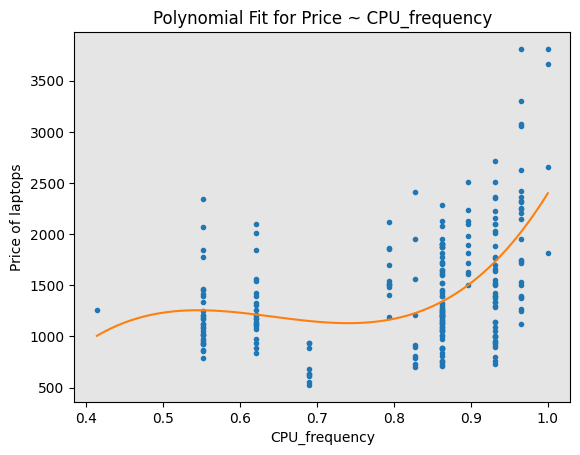

In [32]:
#  Write your code below and press Shift+Enter to execute
# Call for function of degree 3
PlotPolly(p3, X, Y, 'CPU_frequency')

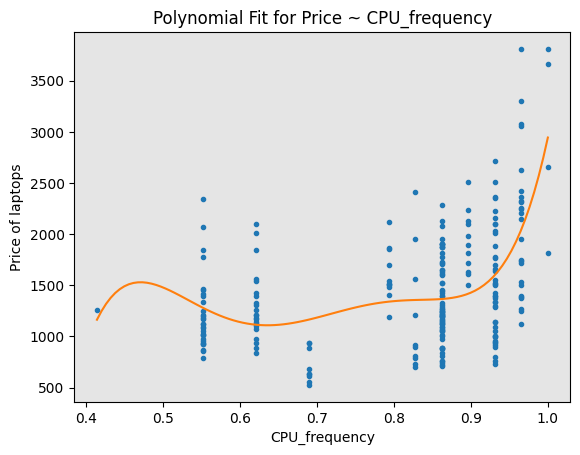

In [33]:
#  Write your code below and press Shift+Enter to execute
# Call for function of degree 5
PlotPolly(p5, X, Y, 'CPU_frequency')

Also, calculate the R^2 and MSE values for these fits. For polynomial functions, the function sklearn.metrics.r2_score will be used to calculate R^2 values.


In [34]:
#  Write your code below and press Shift+Enter to execute
r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y,p1(X)))
r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y,p3(X)))
r_squared_5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y,p5(X)))

The R-square value for 1st degree polynomial is:  0.1344436321024326
The MSE value for 1st degree polynomial is:  284583.4405868629
The R-square value for 3rd degree polynomial is:  0.2669264079653102
The MSE value for 3rd degree polynomial is:  241024.863038488
The R-square value for 5th degree polynomial is:  0.3030822706443361
The MSE value for 5th degree polynomial is:  229137.29548055277


# Task 4 - Pipeline
Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression. Use the set of multiple features as before to create this pipeline. 


In [35]:
#  Write your code below and press Shift+Enter to execute
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)

Evaluate the MSE and R^2 values for the this predicted output.


In [36]:
#  Write your code below and press Shift+Enter to execute
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))

MSE for multi-variable polynomial pipeline is:  120597.06205685399
R^2 for multi-variable polynomial pipeline is:  0.6332058014416082


You should now have seen that the values of R^2 increase as we go from Single Linear Regression to Multiple Linear Regression. Further, if we go for multiple linear regression extended with polynomial features, we get an even better R^2 value.
